In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data 
df = pd.read_sql_query('select * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.270000,36.990002,1750.0,145080,3.811252e+06,142049.0,5.101920e+06,672819.341167,260999.198781,68601.680141,1.290668e+06,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.190001,28.990000,1750.0,164038,3.804041e+06,160247.0,4.819073e+06,561512.375851,294438.657920,144929.240166,1.015032e+06,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.240000,24.990000,1750.0,187407,3.418304e+06,187140.0,4.538121e+06,461140.145689,343854.067793,123780.220203,1.119817e+06,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.170000,22.990000,1750.0,201682,3.261198e+06,200412.0,4.475973e+06,420050.005789,368242.797294,257032.069523,1.214775e+06,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.889999,29.990000,1750.0,138109,3.023206e+06,135838.0,4.223108e+06,545778.283312,249587.828808,257032.069523,1.199902e+06,28.412765,0.983556,1.396897


In [3]:
df.to_csv('vendors_sales_summary.csv', index=False)

**Exploratory Data Analysis**

* Previously we examined the various tables in the database to identify the key variables, understand their relationship and determine which one should be included in the final analysis 

* In this face of EDA we will analyse the resultant table to gain insights into the distribute of each colum this will help us understand data patterns, identify anomalies and ensure data quality before proceeding with further analysis

In [4]:
# summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.000000e+00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,5.800000e+01,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269376,3.600000e-01,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246018,4.900000e-01,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.000000e+00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799579,7.100000e-01,453.457505,3655.464984,20738.244843,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.000000e+00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.266045,0.000000e+00,729.219982,5298.044970,28396.914898,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773491,0.000000e+00,289.709993,2857.799950,16059.562242,6.728193e+05


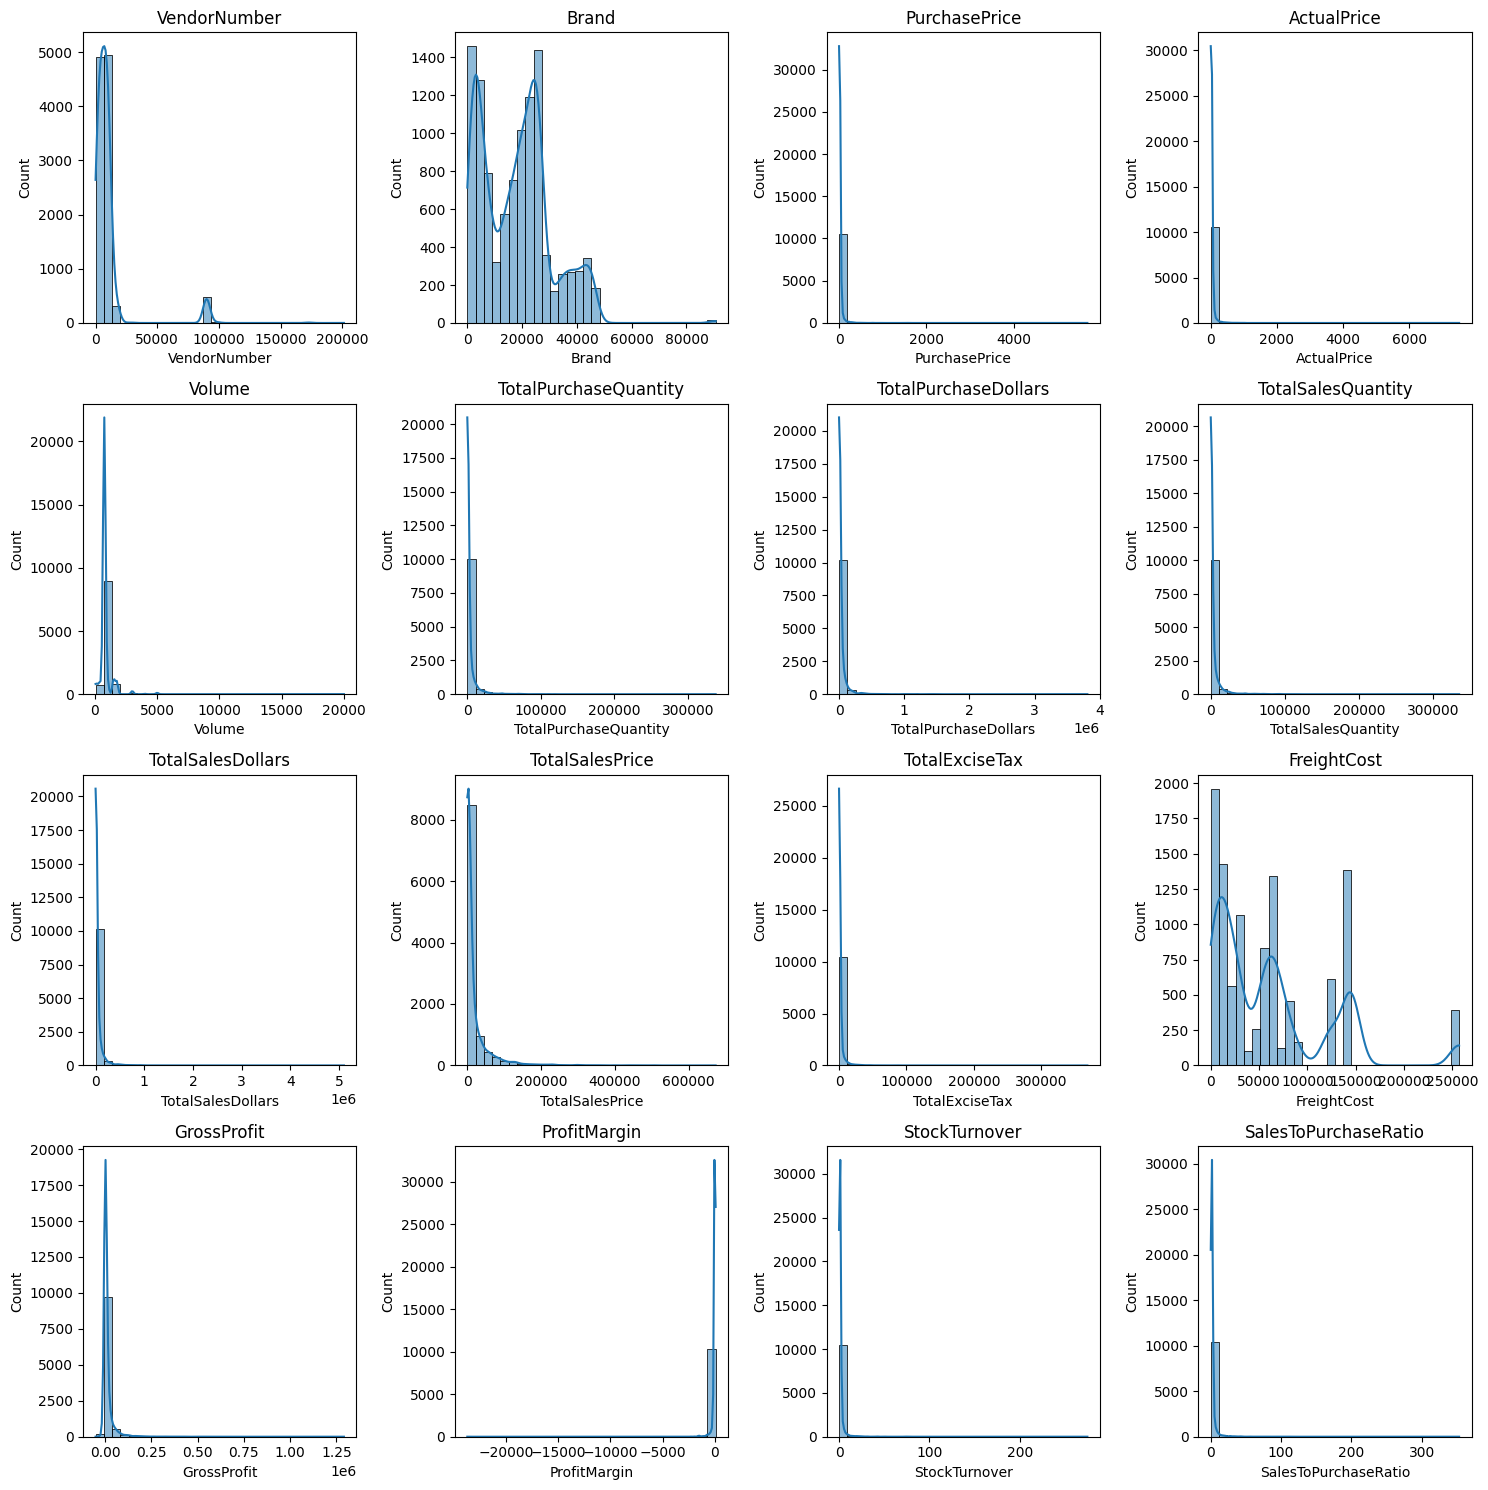

In [5]:
# Distribution plots for numerical columns

numerical_col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_col):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

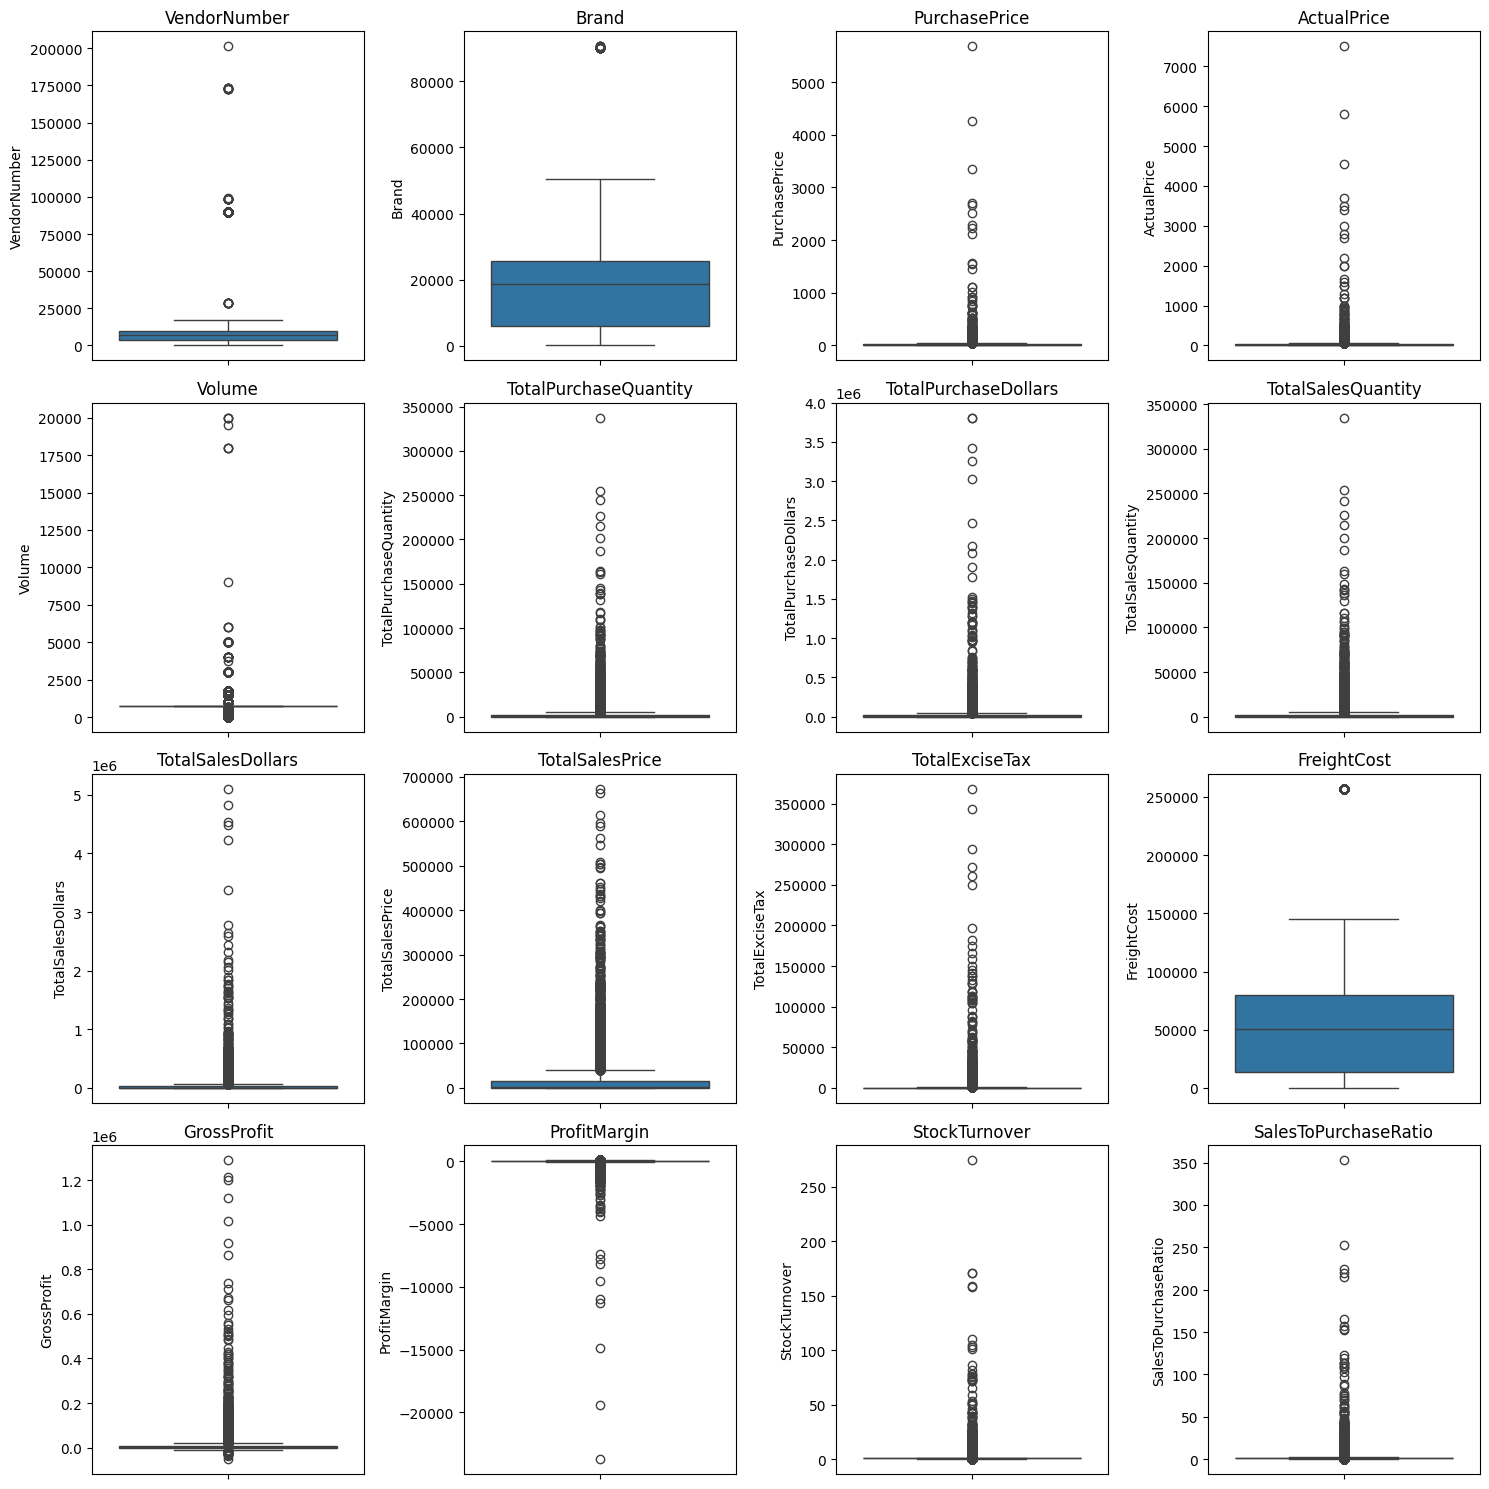

In [6]:
# Distribution plots for numerical columns

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_col):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Summary Statistics Insights:**

**Negative & Zero Values:**

* **Gross Profit:** Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
* **Profit Margin:** Has a minimum of -inf, which suggests cases where revenue is zero or even lower than costs.
* **Total Sales Quantity & Sales Dollars:** Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

* **Purchase & Actual Prices:** The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
* **Freight Cost:** Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* **Stock Turnover:** Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
# Filtering data by removing inconsistencis

df = pd.read_sql_query('select * from vendor_sales_summary where GrossProfit > 0 and ProfitMargin > 0 and TotalSalesQuantity > 0', conn)

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.270000,36.990002,1750.0,145080,3.811252e+06,142049.0,5.101920e+06,672819.341167,260999.198781,68601.680141,1.290668e+06,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.190001,28.990000,1750.0,164038,3.804041e+06,160247.0,4.819073e+06,561512.375851,294438.657920,144929.240166,1.015032e+06,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.240000,24.990000,1750.0,187407,3.418304e+06,187140.0,4.538121e+06,461140.145689,343854.067793,123780.220203,1.119817e+06,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.170000,22.990000,1750.0,201682,3.261198e+06,200412.0,4.475973e+06,420050.005789,368242.797294,257032.069523,1.214775e+06,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.889999,29.990000,1750.0,138109,3.023206e+06,135838.0,4.223108e+06,545778.283312,249587.828808,257032.069523,1.199902e+06,28.412765,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.320000,4.990000,750.0,2,2.640000e+00,5.0,1.595000e+01,10.960000,0.550000,27100.410036,1.331000e+01,83.448275,2.500000,6.041666
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.390000,0.490000,50.0,6,2.340000e+00,134.0,6.566000e+01,1.470000,7.040000,50293.619843,6.332000e+01,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.740000,0.990000,50.0,2,1.480000e+00,2.0,1.980000e+00,0.990000,0.100000,14069.870026,5.000000e-01,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.470000,1.990000,200.0,1,1.470000e+00,72.0,1.432800e+02,77.610000,15.120000,257032.069523,1.418100e+02,98.974037,72.000000,97.469386


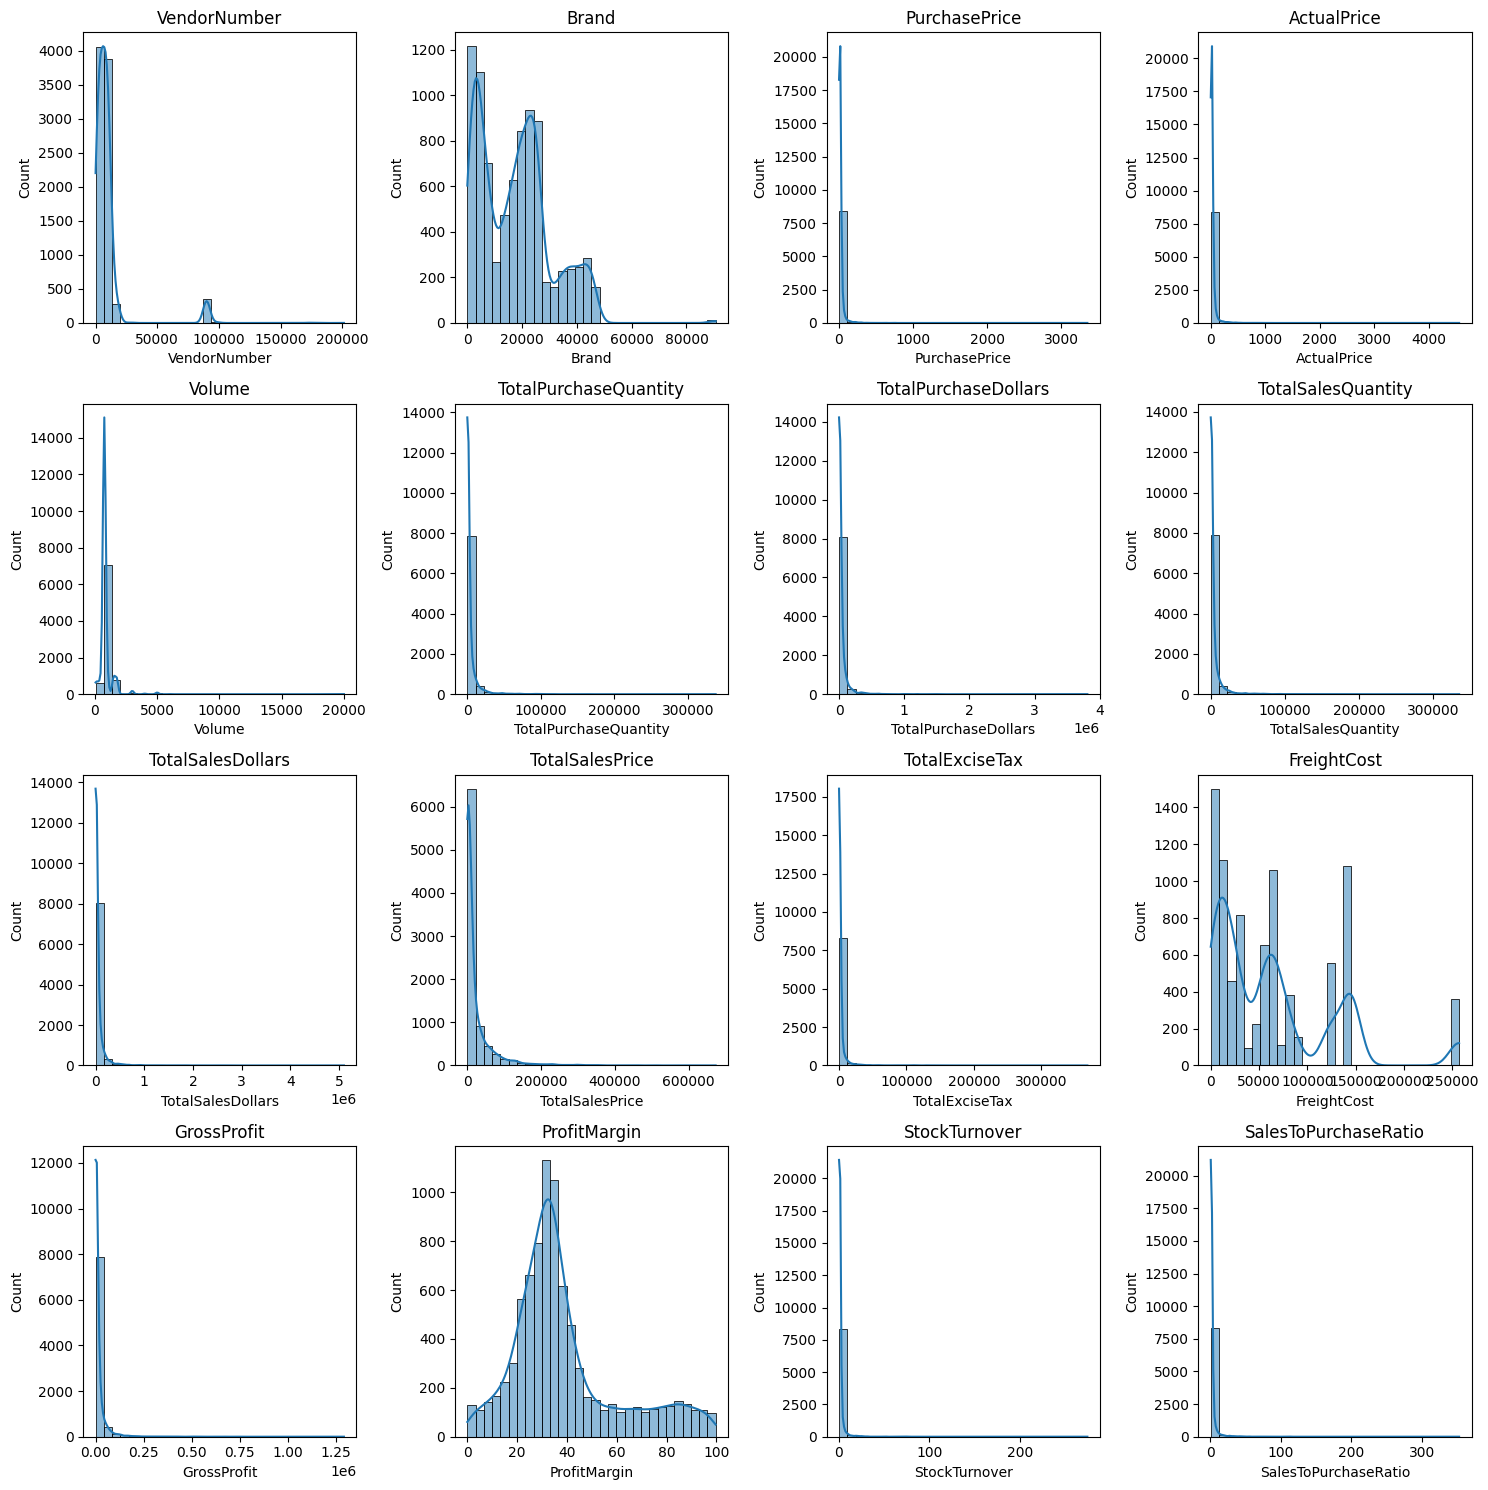

In [8]:
# Distribution plots for numerical columns

numerical_col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_col):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

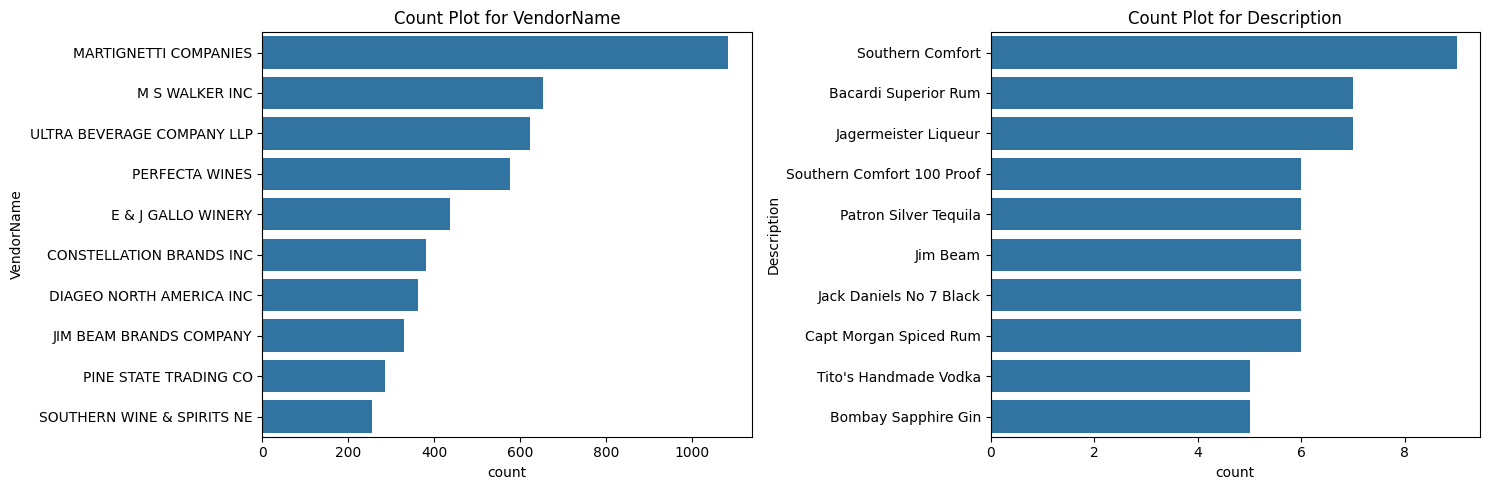

In [9]:
# Count plot for categorical data 

categorical_col = ['VendorName', 'Description']

plt.figure(figsize=(15,5))
for i, col in enumerate(categorical_col):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])   # Top 10 categories
    plt.title(f'Count Plot for {col}')

plt.tight_layout()
plt.show()

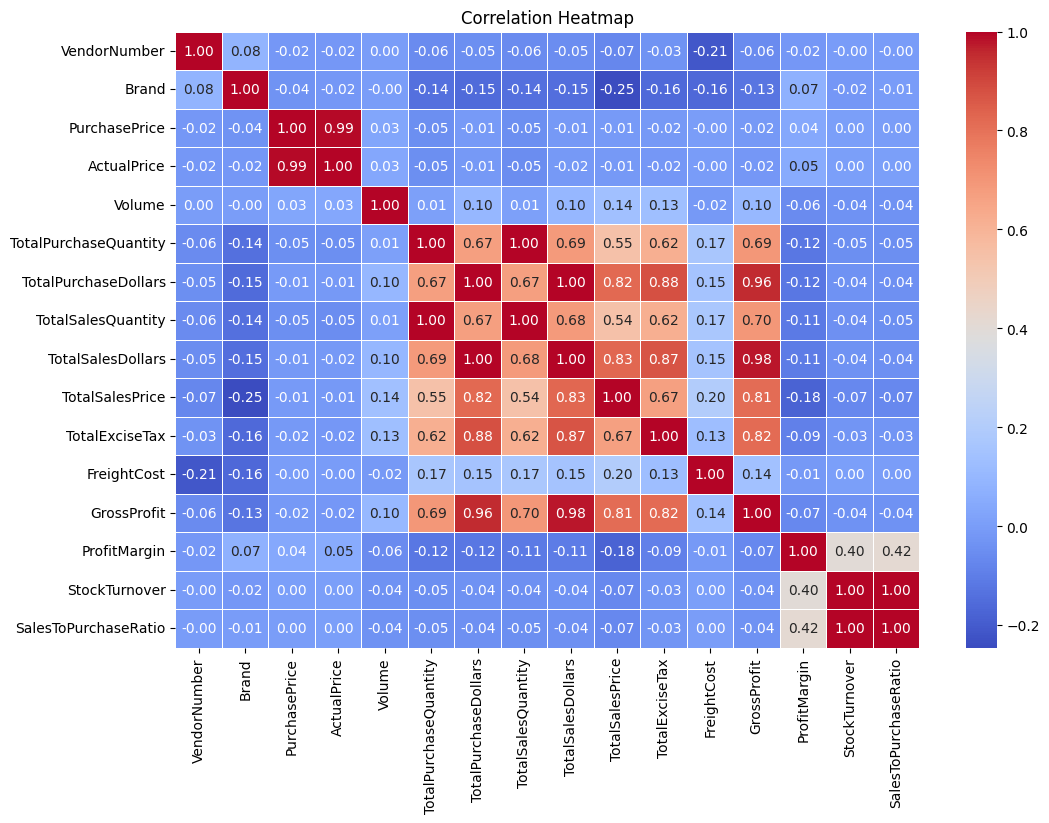

In [10]:
# Corelation between numerical columns

plt.figure(figsize=(12,8))
corelation_matrix = df[numerical_col].corr()
sns.heatmap(corelation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Correlation Insights**

* PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
* Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
* StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

**Answering Business Questions**

* Q1] Identify brands that needs promotion or pricing adjustments which exhibits lower sales performance but higher profit margin ?

In [11]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars' : 'sum', 'ProfitMargin': 'mean'}).reset_index()

In [12]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
print('Low Sales Threshold : ', low_sales_threshold)
print('High Margin Threshold : ', high_margin_threshold)

Low Sales Threshold :  560.2989873886107
High Margin Threshold :  64.97017632687368


In [14]:
# Filter brands with low sales but high margin 

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold) 
]
print('Brand with low sales but high profit margin : ')
display(target_brands.sort_values('TotalSalesDollars'))

Brand with low sales but high profit margin : 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.990000,66.466467
2369,Debauchery Pnt Nr,11.580000,65.975820
2070,Concannon Glen Ellen Wh Zin,15.950000,83.448275
2188,Crown Royal Apple,27.859999,89.806173
6237,Sauza Sprklg Wild Berry Marg,27.959999,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.679998,76.747312
2271,Dad's Hat Rye Whiskey,538.890007,81.851584
57,A Bichot Clos Marechaudes,539.939995,67.740860
6245,Sbragia Home Ranch Merlot,549.750000,66.444748


In [15]:
# For better visualization
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] 

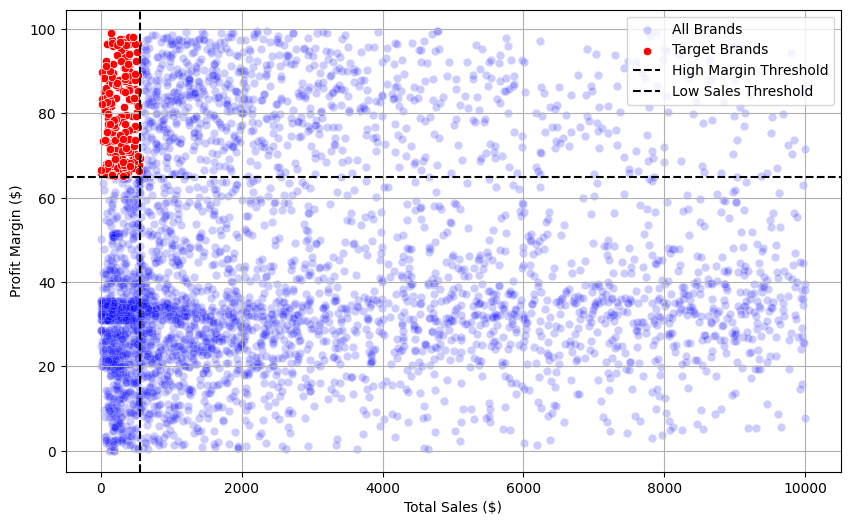

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin ($)')
plt.legend()
plt.grid(True)
plt.show()

Q2] Which vendors and brands demonstrate the highest sales performance ?

In [17]:
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)

In [18]:
top_brands

Description
Jack Daniels No 7 Black    7.964747e+06
Tito's Handmade Vodka      7.399658e+06
Grey Goose Vodka           7.209608e+06
Capt Morgan Spiced Rum     6.356321e+06
Absolut 80 Proof           6.244752e+06
Jameson Irish Whiskey      5.715760e+06
Ketel One Vodka            5.070084e+06
Baileys Irish Cream        4.150122e+06
Kahlua                     3.604859e+06
Tanqueray                  3.456698e+06
Name: TotalSalesDollars, dtype: float64

In [19]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [20]:
def format_dollar(val):
    if val > 1_000_000:
        return f'{val/1_000_000:.2f} M'
    elif val > 1_000:
        return f'{val/1_000:.2f} K'
    else:
        return str(val)
    
top_brands.apply(lambda x : format_dollar(x))

Description
Jack Daniels No 7 Black    7.96 M
Tito's Handmade Vodka      7.40 M
Grey Goose Vodka           7.21 M
Capt Morgan Spiced Rum     6.36 M
Absolut 80 Proof           6.24 M
Jameson Irish Whiskey      5.72 M
Ketel One Vodka            5.07 M
Baileys Irish Cream        4.15 M
Kahlua                     3.60 M
Tanqueray                  3.46 M
Name: TotalSalesDollars, dtype: object

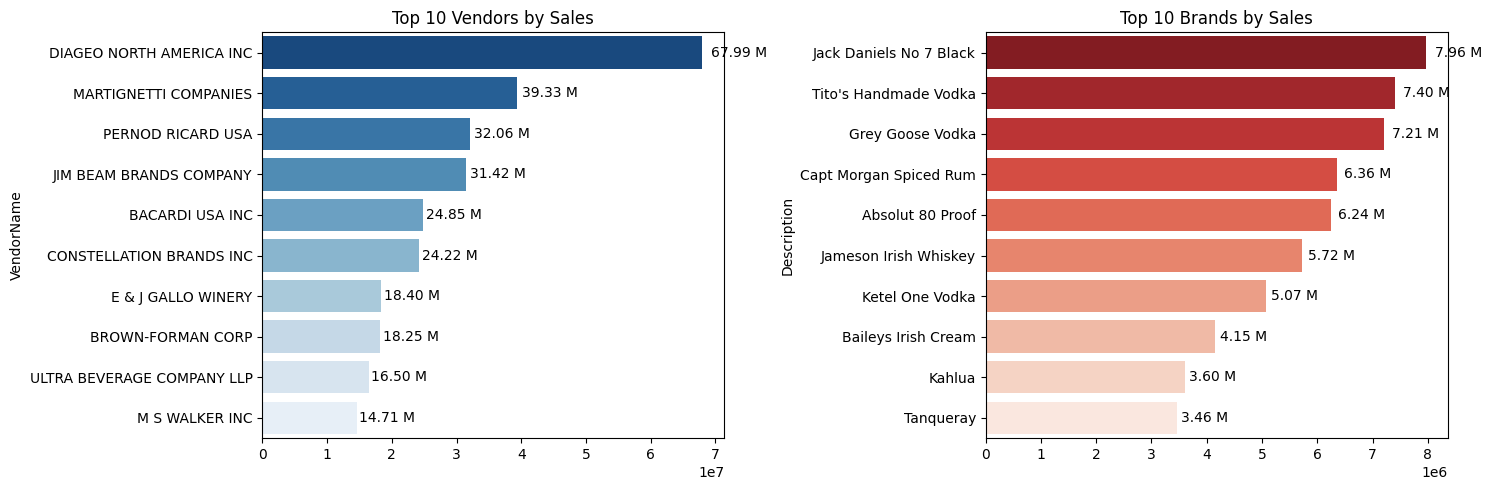

In [21]:
plt.figure(figsize=(15,5))

# top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollar(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
    
# top vendors
plt.subplot(1,2,2)
ax1 = sns.barplot(x=top_brands.values, y=top_brands.index.astype(str), palette='Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollar(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()

Q3] Which vendors contributes the most to the total purchase dollars ?

In [22]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'  
}).reset_index()

In [23]:
vendor_performance['Purchase_Contribution%'] = (vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum())*100

In [24]:
vendor_performance = round(vendor_performance.sort_values('Purchase_Contribution%', ascending = False),2)

In [25]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollar)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollar)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollar)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10 M,17.89 M,67.99 M,16.30
57,MARTIGNETTI COMPANIES,25.50 M,13.83 M,39.33 M,8.30
68,PERNOD RICARD USA,23.85 M,8.21 M,32.06 M,7.76
46,JIM BEAM BRANDS COMPANY,23.49 M,7.93 M,31.42 M,7.64
6,BACARDI USA INC,17.43 M,7.42 M,24.85 M,5.67
20,CONSTELLATION BRANDS INC,15.27 M,8.95 M,24.22 M,4.97
11,BROWN-FORMAN CORP,13.24 M,5.01 M,18.25 M,4.31
30,E & J GALLO WINERY,12.07 M,6.33 M,18.40 M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17 M,5.34 M,16.50 M,3.63
53,M S WALKER INC,9.76 M,4.94 M,14.71 M,3.18


In [26]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10 M,17.89 M,67.99 M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50 M,13.83 M,39.33 M,8.30,24.60
68,PERNOD RICARD USA,23.85 M,8.21 M,32.06 M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49 M,7.93 M,31.42 M,7.64,40.00
6,BACARDI USA INC,17.43 M,7.42 M,24.85 M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27 M,8.95 M,24.22 M,4.97,50.64
11,BROWN-FORMAN CORP,13.24 M,5.01 M,18.25 M,4.31,54.95
30,E & J GALLO WINERY,12.07 M,6.33 M,18.40 M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17 M,5.34 M,16.50 M,3.63,62.51
53,M S WALKER INC,9.76 M,4.94 M,14.71 M,3.18,65.69


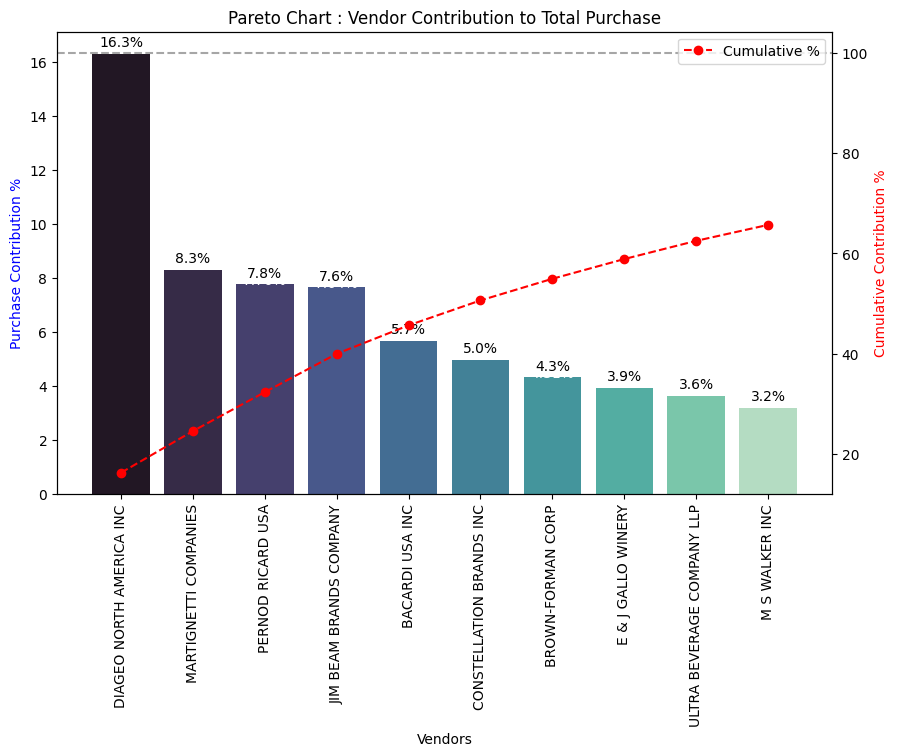

In [27]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar Plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette='mako', ax=ax1)

for i, val in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, val, str(val)+'%', ha='center', fontsize=10, color='white')

# Line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart : Vendor Contribution to Total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', padding=3)


plt.show()

Q3] How much of total procurement is dependent on the top vendor ?

In [28]:
print('Total purchase contribution of top 10 vendors is : ', round(top_vendors['Purchase_Contribution%'].sum(), 2), '%')

Total purchase contribution of top 10 vendors is :  65.69 %


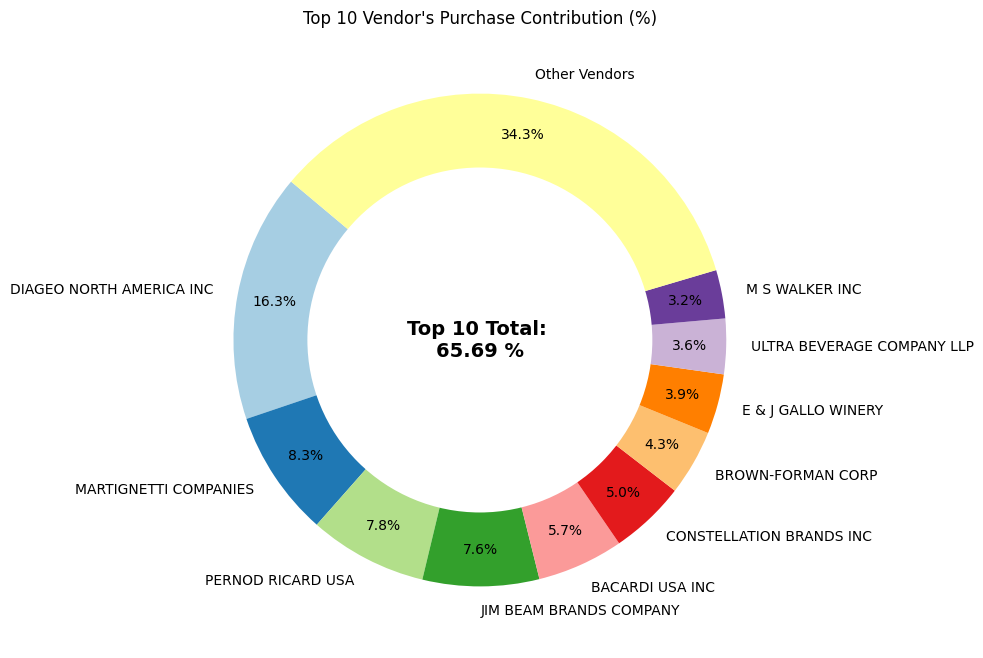

In [29]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Apprnd "Other Vendors" category
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Drw a white circle to create a donut effect
center_circle = plt.Circle((0,0), .70, fc='white')
fig.gca().add_artist(center_circle)

# Add total contribution annotation at center_circle
plt.text(0,0,f'Top 10 Total: \n{total_contribution:.2f} %', fontsize=14, fontweight= 'bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Q4] Does purchasing in bulk reduces the unit price, and what is the optimal purchase volume for saving cost ?

In [30]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [31]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small','Medium','Large'])

In [32]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


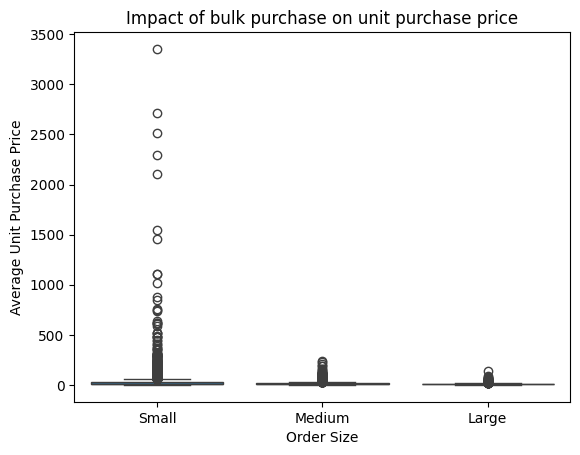

In [33]:
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice')
plt.title('Impact of bulk purchase on unit purchase price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

* The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

Q5] Which vendors have low inventory turnover, indicating excess stock and slow-moving products ?

In [34]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)
# StockTurnover < 1 means these vendors can sell the previous stock,  before buying a new stock, therefore indicating good vendors.

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


Q6] How much capital is locked in unsold inventory per vendor, and which vendor contributes the most to it ?

In [35]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital : ', format_dollar(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital :  2.71 M


In [36]:
# Aggregate capital locked per vendor
invenetory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort vendors with highest locked capital
invenetory_value_per_vendor = invenetory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending=False)
invenetory_value_per_vendor['UnsoldInventoryValue'] = invenetory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollar)
invenetory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21 K
46,JIM BEAM BRANDS COMPANY,554.67 K
68,PERNOD RICARD USA,470.63 K
116,WILLIAM GRANT & SONS INC,401.96 K
30,E & J GALLO WINERY,228.28 K
79,SAZERAC CO INC,198.44 K
11,BROWN-FORMAN CORP,177.73 K
20,CONSTELLATION BRANDS INC,133.62 K
61,MOET HENNESSY USA INC,126.48 K
77,REMY COINTREAU USA INC,118.60 K


Q7] What is 95% confidence interval for profit margin of top-performing and low-performing vendors ?

In [37]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [38]:
top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()


In [39]:
print('Top Vendors : ')
top_vendors

Top Vendors : 


0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412765
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2142, dtype: float64

In [40]:
print('Low Vendors : ')
low_vendors

Low Vendors : 


5631     4.111766
5652     6.145624
5701    12.007270
5704     1.677305
5724     7.239600
          ...    
8560    83.448275
8561    96.436186
8562    25.252525
8563    98.974037
8564    99.166079
Name: ProfitMargin, Length: 2142, dtype: float64

In [41]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) 
    t_critical = stats.t.ppf((1+confidence)/2, df = len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean : 31.17
Low Vendors 95% CI: (40.48, 42.62), Mean : 41.55


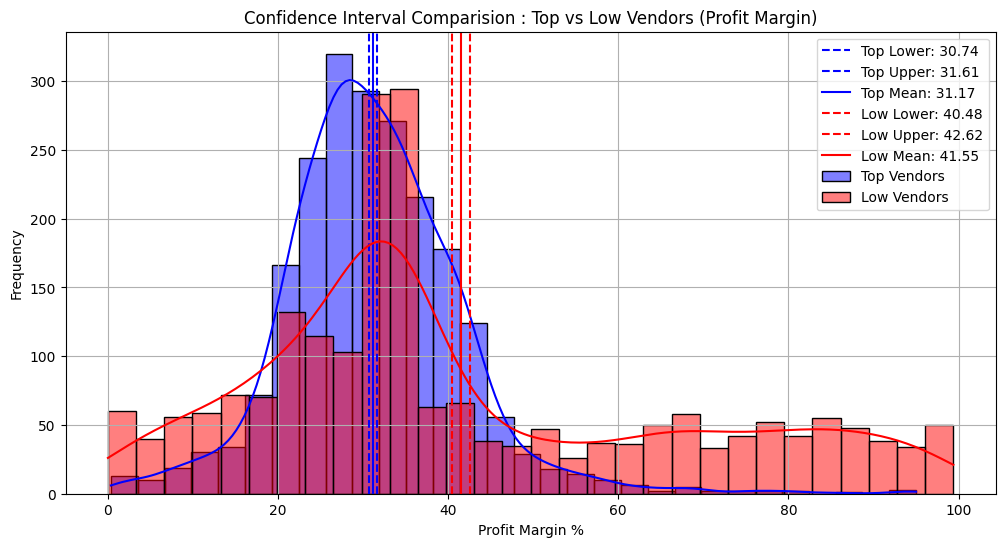

In [42]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f'Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean : {top_mean:.2f}')
print(f'Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean : {low_mean:.2f}')

plt.figure(figsize=(12,6))

# Top vendors plot
sns.histplot(top_vendors, kde=True, color='blue', bins=30, alpha= 0.5, label='Top Vendors')
plt.axvline(top_lower, color='blue', linestyle='--', label=f'Top Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle='--', label=f'Top Upper: {top_upper:.2f}')
plt.axvline(top_mean, color='blue', linestyle='-', label=f'Top Mean: {top_mean:.2f}')

# Low vendors plot
sns.histplot(low_vendors, kde=True, color='red', bins=30, alpha= 0.5, label='Low Vendors')
plt.axvline(low_lower, color='red', linestyle='--', label=f'Low Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle='--', label=f'Low Upper: {low_upper:.2f}')
plt.axvline(low_mean, color='red', linestyle='-', label=f'Low Mean: {low_mean:.2f}')

# Finalize Plot
plt.title('Confidence Interval Comparision : Top vs Low Vendors (Profit Margin)')
plt.xlabel('Profit Margin %')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Findings :**
* The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

**Rcommendations :**
* For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

* For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

Q8] Is there significant difference in profit margin between top-performing and low-performing vendors ? 

**Hypothesis Testing :**

**H0 (Null Hypothesis) :** there is no significant difference in profit margin between top-performing and low-performing vendors.

**H1 (Alternative Hypothesis):** there is significant difference in profit margin between top-performing and low-performing vendors.

In [43]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

# Perform two-sample t-test 
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print result
print(f'T-Statistics : {t_stat:.4f}, P-value : {p_value:.4f}')
if p_value < 0.05:
    print('Reject H0 : there is significant difference in profit margin between top-performing and low-performing vendors.')
else:
    print('Fail to reject H0: there no is significant difference in profit margin between top-performing and low-performing vendors.')

T-Statistics : -17.6440, P-value : 0.0000
Reject H0 : there is significant difference in profit margin between top-performing and low-performing vendors.
